## 仕様

- static/image 配下の「mae」「ato」フォルダにそれぞれ比較対象の帳票を格納する。
- main 関数の実行を行う。
- static/output_image 配下の「mae」「ato」フォルダに差分を描画後の帳票を格納する。

## 差分がある箇所は以下の形式で再描画している。

- 表のタイトルに差分がある場合は、水色でタイトル下部を描画。
- 表内に差分がある場合は、赤色でセルを描画。

## ツールの制約

- OCR の技術は 100%ではない。空白の誤検知が多いため、現新比較対象前に空白削除処理を行っている。よって、空白差分を本ツールでは検知できない。
- OCR で一部の写真は文字自体を検知できない場合がある。事前の画像処理で改善を図るも、現状は課題解決していない。

In [2]:
##main関数。実行結果は下記の通り。

import os
import cv2
from PIL import Image as PILImage
import tqdm

from lib.python import processing as p
from lib.python import fileOpe

def diff_image_Azure(image_folder_pass,png_img_name):
    
    img_obj = p.imagetable(image_folder_pass,png_img_name)

    mae_extracted_tables = img_obj.getImageTable_Azure('mae')
    ato_extracted_tables = img_obj.getImageTable_Azure('ato')

    mae_cleansing_tables = img_obj.cleansing(mae_extracted_tables)
    ato_cleansing_tables = img_obj.cleansing(ato_extracted_tables)

    mae_frame_img = img_obj.visualFrameTable(mae_extracted_tables,MA_Flag = 'mae')
    ato_frame_img = img_obj.visualFrameTable(ato_extracted_tables,MA_Flag = 'ato')

    mae_img = cv2.imread(image_folder_pass +'mae/'+png_img_name)
    ato_img = cv2.imread(image_folder_pass +'ato/'+png_img_name)

    mae_diff_img,ato_diff_img = img_obj.diff_draw(
        mae_cleansing_tables,ato_cleansing_tables,
        mae_img,ato_img,mae_extracted_tables,ato_extracted_tables  
    )
    
    
    return mae_diff_img,ato_diff_img

if __name__ == '__main__':
    
    #PWD = '/Users/satoki252595/work/20240114_nriocr2'
    PWD = os.getcwd()
    image_folder_pass = PWD + '/static/image/'
    image_folder_output_pass = PWD + '/static/output_image/'

    and_list,diff_list = fileOpe.get_file_list(image_folder_pass)
    
    if len(diff_list) != 0:
        print('以下のファイルは同一名のファイルではないので、現新比較対象外です')    
        print(diff_list)
        
    for png_img_name in tqdm.tqdm(and_list):
    
        mae_diff_img,ato_diff_img  = diff_image_Azure(image_folder_pass,png_img_name)
        mae_img = PILImage.fromarray(mae_diff_img)
        ato_img = PILImage.fromarray(ato_diff_img)
        mae_img.save(image_folder_output_pass + 'mae/' + png_img_name)
        ato_img.save(image_folder_output_pass + 'ato/' + png_img_name)
        
    print('現新比較が終了しました。') 

以下のファイルは同一名のファイルではないので、現新比較対象外です
['ato.png', 'mae.png']


100%|████████████████████████████████████████████████████████████████████| 2/2 [01:03<00:00, 31.59s/it]

現新比較が終了しました。


In [36]:
##ただ、画像を横に並べるだけの関数

import matplotlib.pyplot as plt

def get_concat_h_blank(im1, im2, color=(0, 0, 0)):
    dst = Image.new('RGB', (im1.width + im2.width, max(im1.height, im2.height)), color)
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

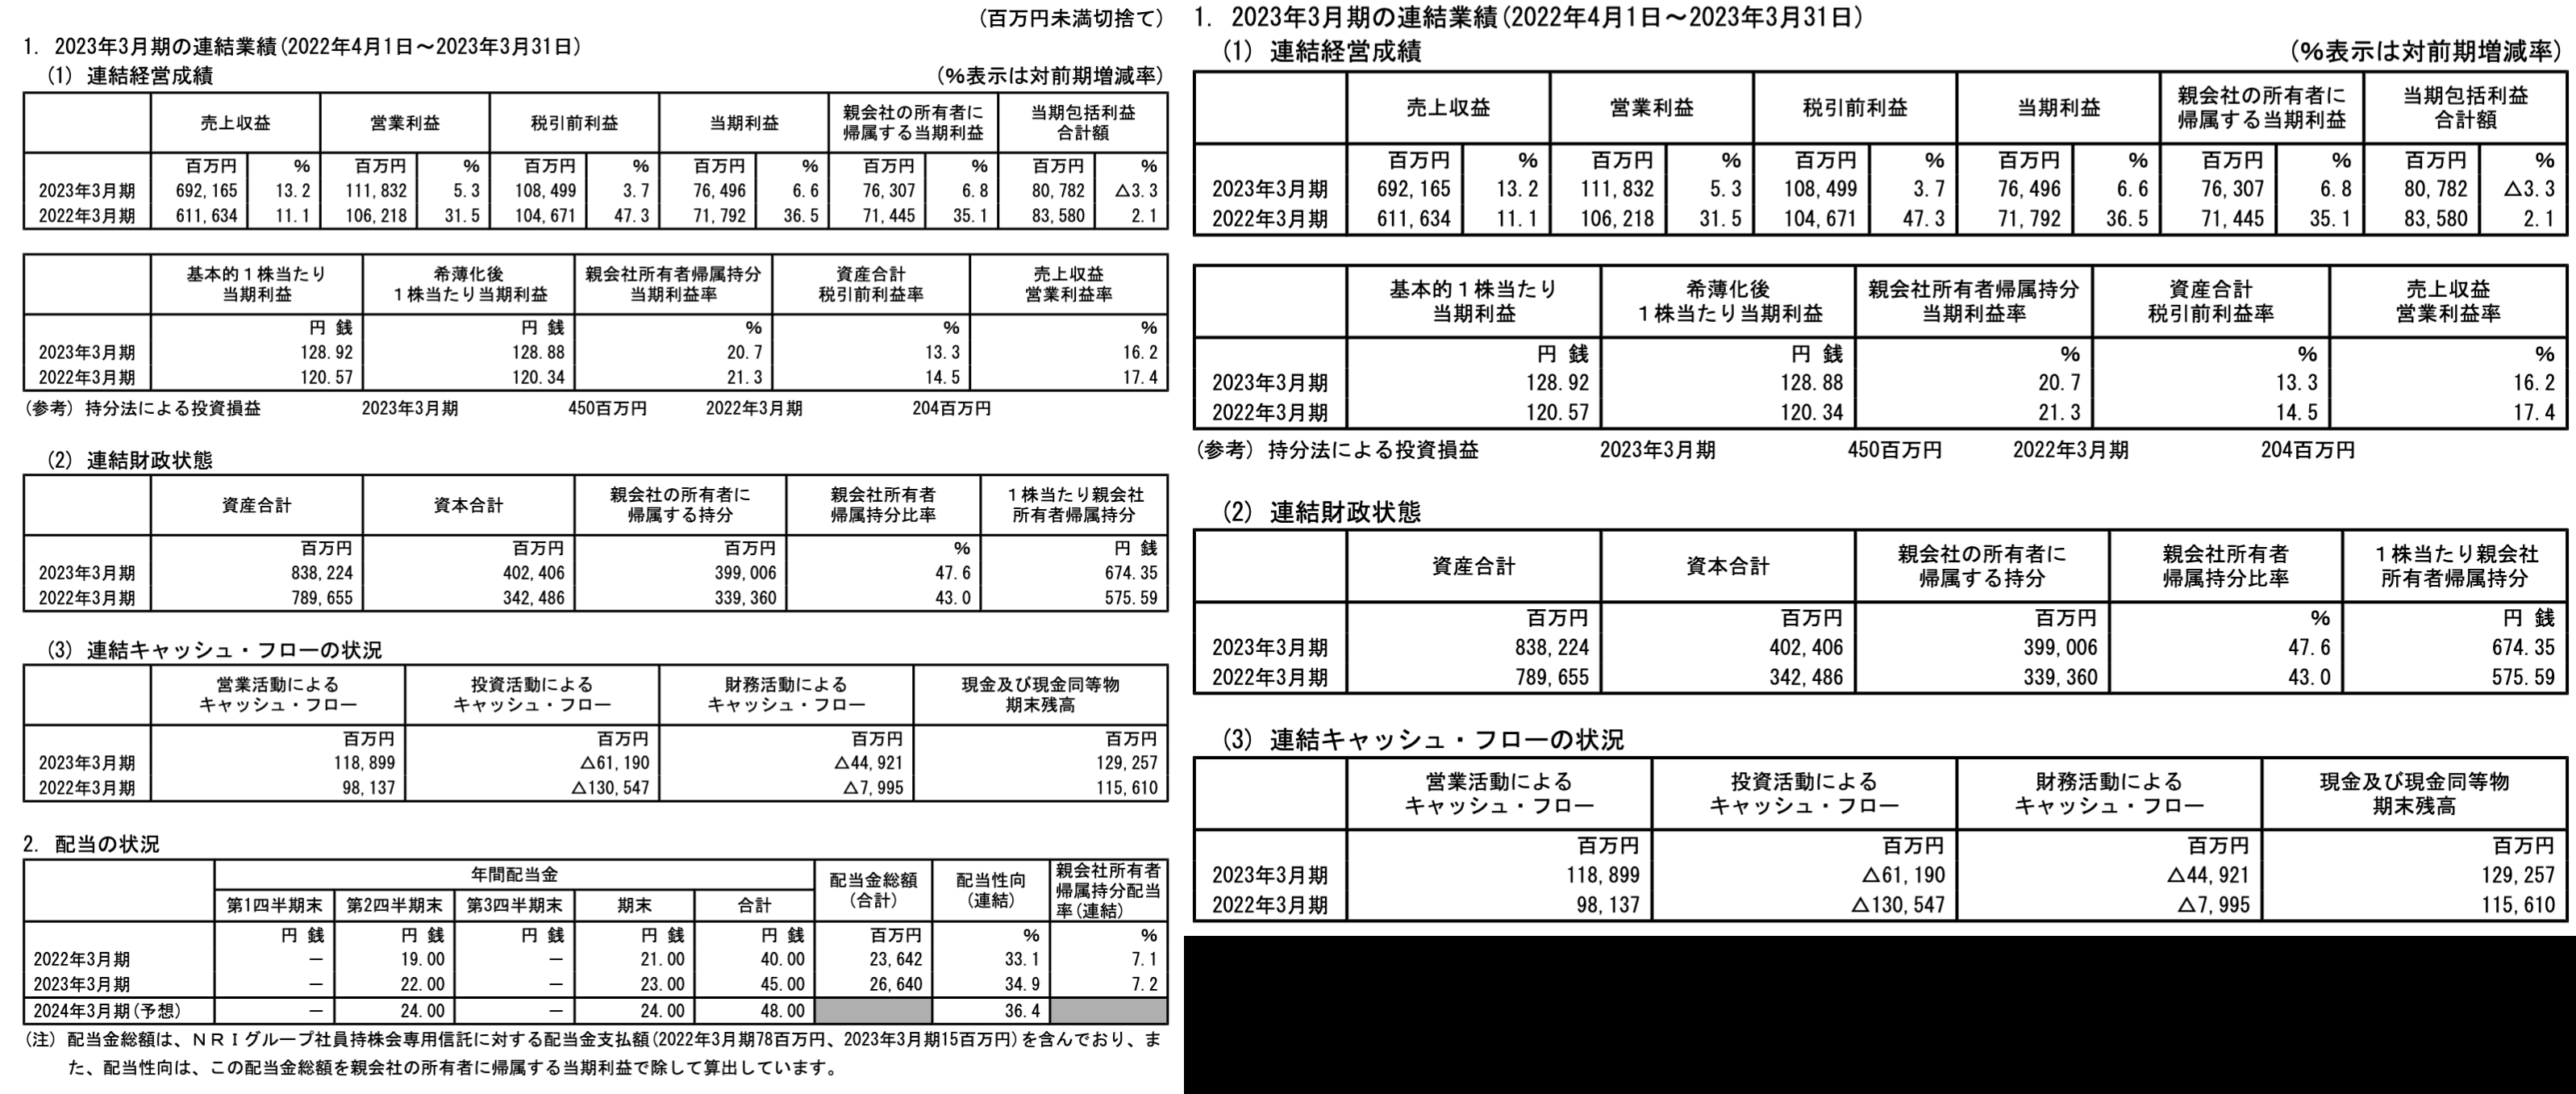

In [39]:
##差分比較前の現新比較対象のファイル。
##サンプル①：2024年のNRI決算短信をレイアウトが異なる形で描画している画像。

png_img_name = '4307_2024.png'

im1 = Image.open(image_folder_pass + 'mae/' +png_img_name)
im2 = Image.open(image_folder_pass + 'ato/' +png_img_name)

get_concat_h_blank(im1, im2).save(PWD + '/static/work/' + 'mae_'+png_img_name)
img = cv2.imread(PWD + '/static/work/' + 'mae_'+png_img_name,cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pil_img = Image.fromarray(img)
display(pil_img)

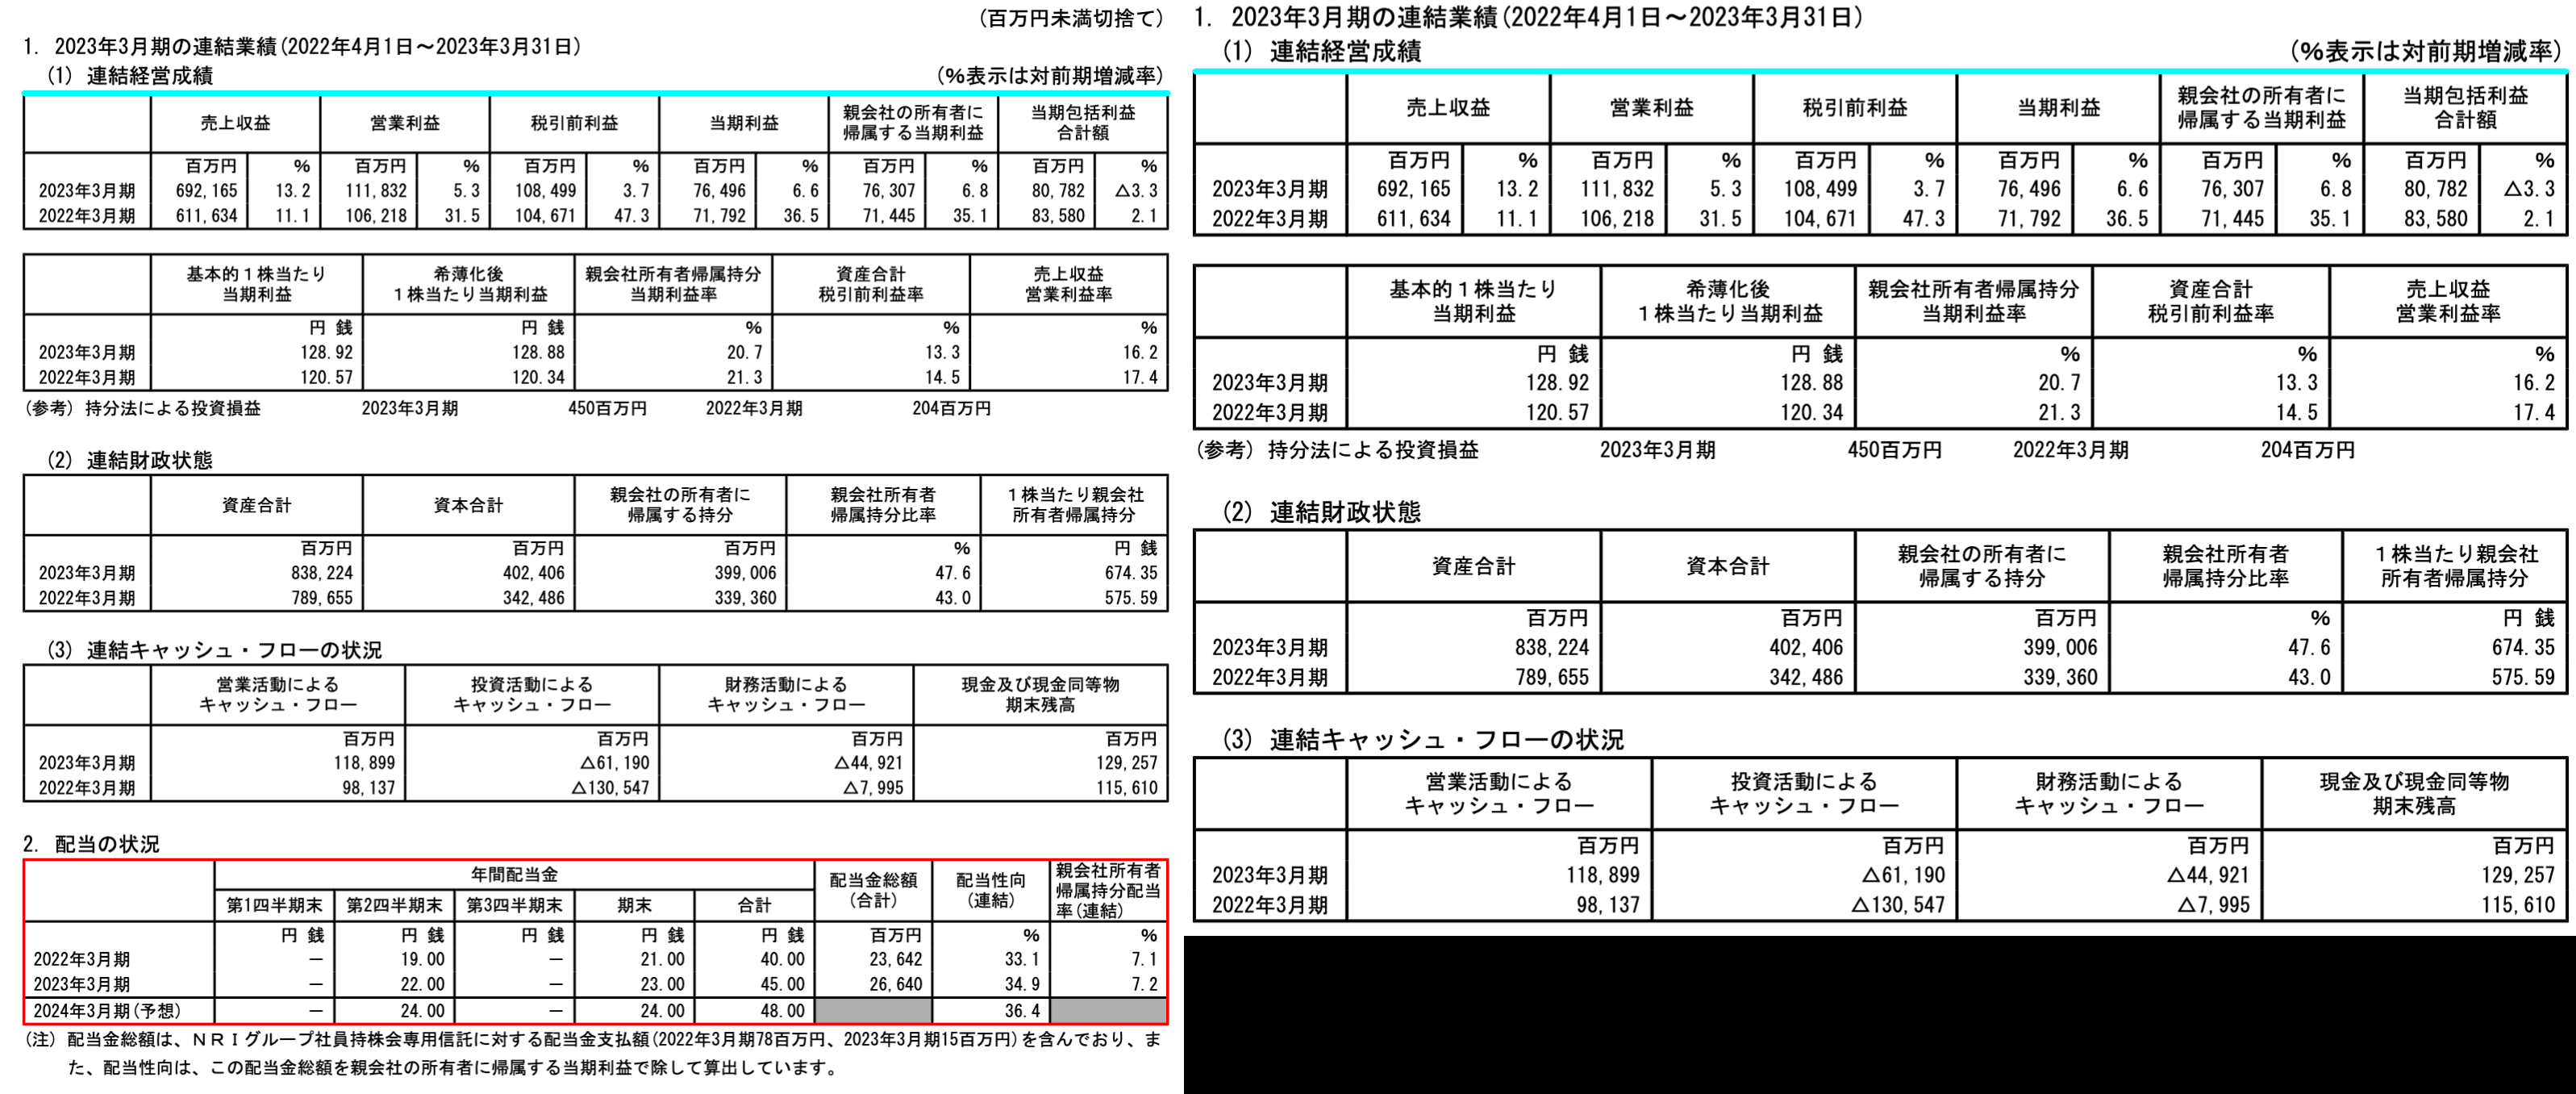

In [41]:
##差分比較後の現新比較対象のファイル。サンプル①。
##正しく、差分箇所を表現できている。

png_img_name = '4307_2024.png'

im1 = Image.open(image_folder_output_pass + 'mae/' +png_img_name)
im2 = Image.open(image_folder_output_pass + 'ato/' +png_img_name)

get_concat_h_blank(im1, im2).save(PWD + '/static/work/' + 'ato_'+png_img_name)
img = cv2.imread(PWD + '/static/work/' + 'ato_'+png_img_name,cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pil_img = Image.fromarray(img)
display(pil_img)

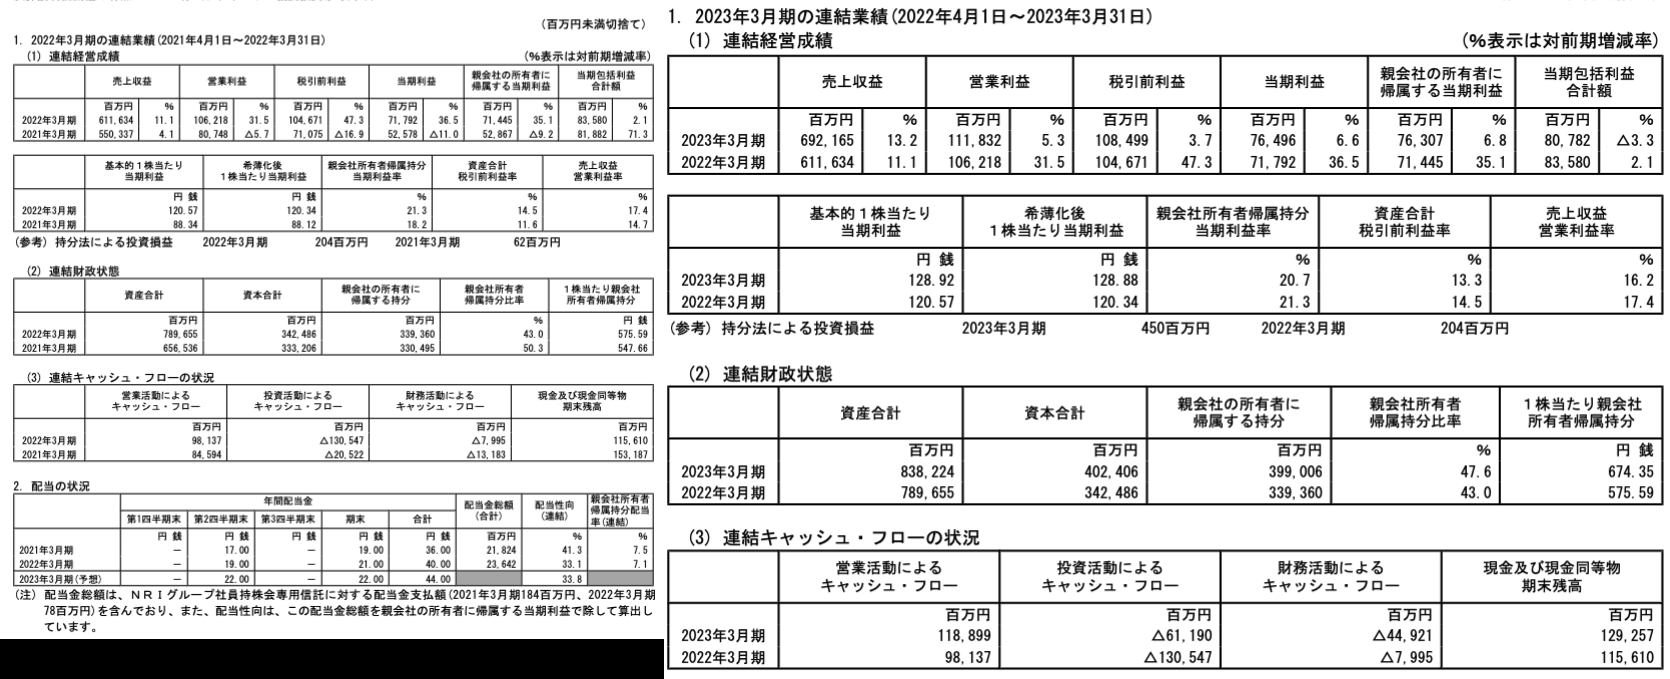

In [42]:
##差分比較前の現新比較対象のファイル。
##サンプル②：2022年と2023年のNRI決算短信をレイアウトが異なる形で描画している画像。

png_img_name = '4307.png'

im1 = Image.open(image_folder_pass + 'mae/' +png_img_name)
im2 = Image.open(image_folder_pass + 'ato/' +png_img_name)

get_concat_h_blank(im1, im2).save(PWD + '/static/work/' + 'mae_'+png_img_name)
img = cv2.imread(PWD + '/static/work/' + 'mae_'+png_img_name,cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pil_img = Image.fromarray(img)
display(pil_img)

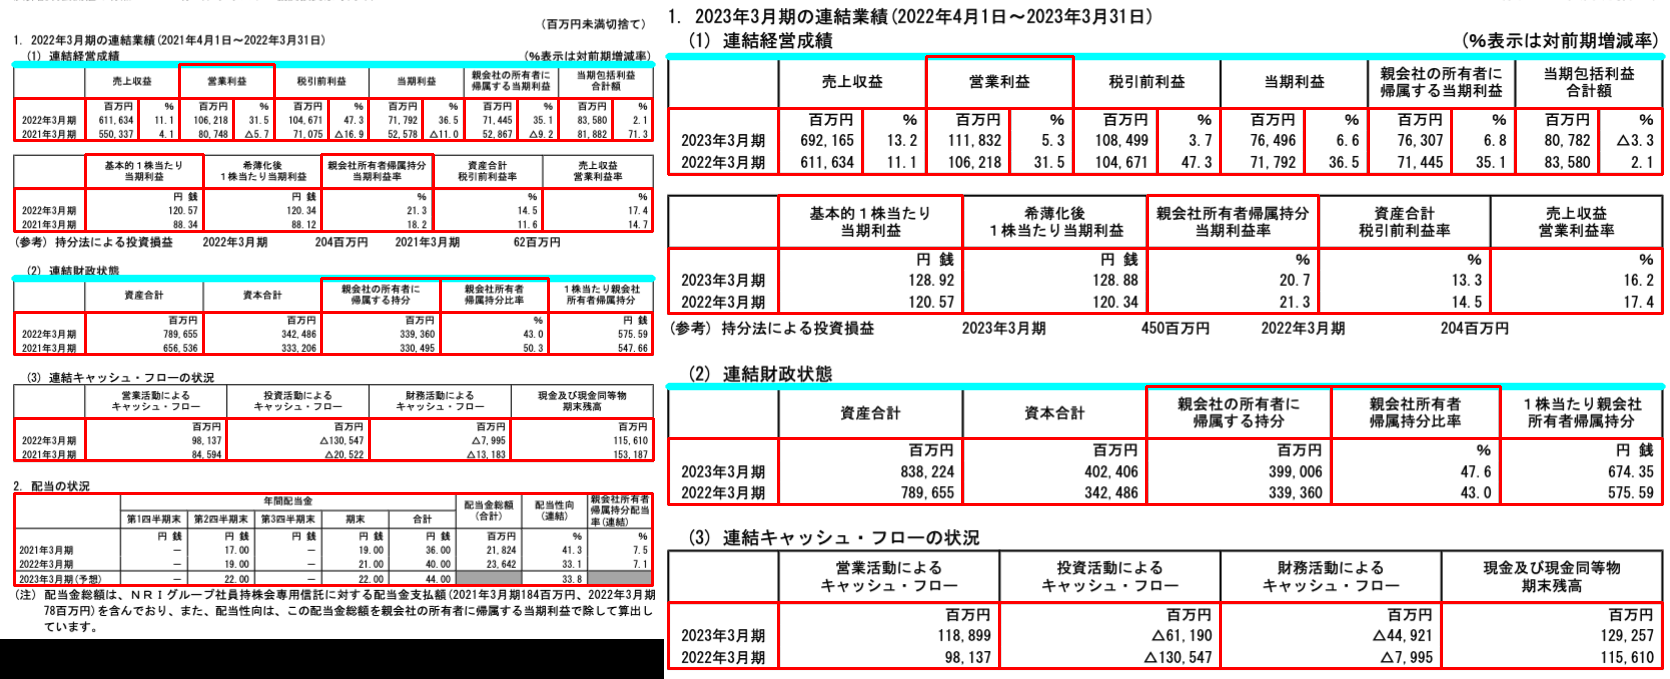

In [44]:
##差分比較後の現新比較対象のファイル。サンプル②。
##　表内のヘッダー部分の一部が誤って検出されている。（例：連結経営成績の"営業利益"の部分など）

png_img_name = '4307.png'

im1 = Image.open(image_folder_output_pass + 'mae/' +png_img_name)
im2 = Image.open(image_folder_output_pass + 'ato/' +png_img_name)

get_concat_h_blank(im1, im2).save(PWD + '/static/work/' + 'ato_'+png_img_name)
img = cv2.imread(PWD + '/static/work/' + 'ato_'+png_img_name,cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pil_img = Image.fromarray(img)
display(pil_img)